In [82]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from sympy import Symbol
import random as rd
plt=reload(plt)

## Исходная функция

In [83]:
def fn(x):
    return x**2 + np.sin(x)

In [109]:
a = int(input('Введите левую границу a: '))
b = int(input('Введите правую границу b: '))

fun_vals = []
eps = 10
x, y = [], []
interval = np.linspace(a, b, 100)

# Генерируем приближенные значения функции в абсциссах
for i in interval:
    fun_vals.append(fn(i) + (-1)**(rd.randint(-1, 1))*5*np.cos(i))
    x.append(i)
    
x = np.array(x, float)    
y = np.array(fun_vals, float)

# print('Множество абсцисс: ', x)
# print('Множество ординат: ', y)

n = int(input('Введите Степень многочлена для МНК n (она должна быть меньше числа точек из входных данных!): '))

Введите левую границу a: -6
Введите правую границу b: 9
Введите Степень многочлена для МНК n (она должна быть меньше числа точек из входных данных!): 50


## Нормальные уравнения

76.8657089276239*x**99 + 82.9359209452523*x**98 + 80.4331125346362*x**97 + 76.2410254490387*x**96 + 74.3794346549112*x**95 + 70.7525612594181*x**94 + 66.0233217986843*x**93 + 62.4225355883418*x**92 + 60.3932763709515*x**91 + 58.904477526145*x**90 + 56.96538677186*x**89 + 54.3899206280601*x**88 + 51.6126626877143*x**87 + 49.1518046579238*x**86 + 47.2329480067191*x**85 + 45.7304512438318*x**84 + 44.3263378539665*x**83 + 42.7162827194389*x**82 + 40.7435252972771*x**81 + 38.4259685442244*x**80 + 35.9034400678913*x**79 + 33.3549818941949*x**78 + 30.9287264770492*x**77 + 28.7060141428423*x**76 + 26.7008275594174*x**75 + 24.8827045804973*x**74 + 23.207369644089*x**73 + 21.6420954922861*x**72 + 20.178770040968*x**71 + 18.8337418845341*x**70 + 17.6378784280522*x**69 + 16.6222499144867*x**68 + 15.8047131177146*x**67 + 15.1811449187446*x**66 + 14.723000167552*x**65 + 14.3809236630865*x**64 + 14.0927574822025*x**63 + 13.7936120163039*x**62 + 13.4256631207418*x**61 + 12.9458224173057*x**60 + 12.330

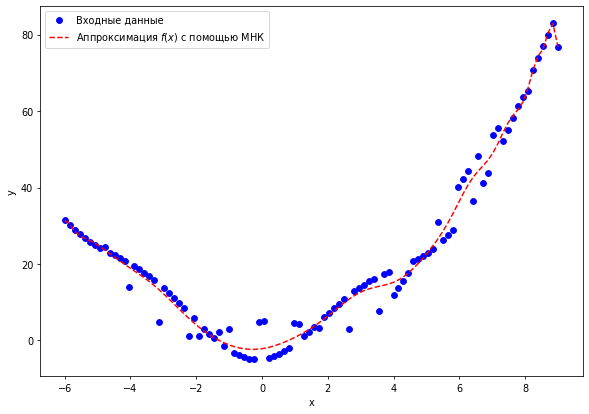

In [121]:
# рассматриваем многочлен: y = c0 + c1(x) + c2(x**2) +...+ cn(x**n)

pts = len(x) # число точек во входных данных
polyval = [] # здесь будем хранить poly fit values

if n+1 > pts:
    print('Внимание: Степень многочлена должга быть меньше числа точек из входных данных')
    print('Проверьте правильность введенных данных')
    sys.exit()

# Реализация МНК
else:
    matrixA = np.zeros((pts, n + 1)) # создаем матрицу А
    matrixB = np.zeros((pts, 1)) # создаем матрицу B

    # loop to populate arrays
    for i in range(pts):
        matrixB[i][0] = y[i] # b gets y values
        for j in range(n + 1):
            matrixA[i][j] = (x[i])**j # A gets x values^j

    # Нормальные уравнения (A^T)Ax=(A^T)b
    At = np.transpose(matrixA) # A transpose (A^T)
    AtA = np.dot(At, matrixA) # matrix multiply (A^T)A
    AtB = np.dot(At, matrixB) # matrix multiply (A^T)b
    coeff = np.linalg.solve(AtA, AtB) # solve normal equation (A^T)Ax=(A^T)b

    # get y-fit values
    for i in range(pts):
        yval = 0
        for j in range(n + 1):
            yval = yval + coeff[j, 0]*(x[i])**j # gets new y value using fit coeffs
        polyval.append(yval) # collect new y values

    def approximation(arg):
        arg = Symbol('x')
        function = 0
        for i in range(pts):
            function += polyval[i] * arg**i
        return function
    
    print(approximation(10))
    # Стандартное отклонение
    error = y - polyval
    sumval = np.sum(error**2)
    stddev = (sumval/(pts - (n + 1)))**0.5

    # Коэффициенты корреляции of fit as alternate "goodness of fit"
    ymean = np.sum(y)/pts
    sumfit = np.sum((y - ymean)**2)
    rvalue = ((sumfit - sumval)/sumfit)**0.5

    # Визуализация
    plt.figure(figsize=(10, 7), dpi=70)
    plt.plot(x, y, 'bo', label='Входные данные')
    plt.plot(x, polyval, 'r--', label='Аппроксимация $f(x)$ с помощью МНК')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc=2)

    
    print('\nКоэффициенты многочлена:')
    for i in coeff.flatten():
        print(i)
    print('\nСтандартное отклонение: ', stddev)
    print('\nКоэффициент корреляции: ', rvalue)